In [295]:
import pandas as pd

@author: MUSTAFA YALINIZ

In [296]:
# Veriyi oku
data = pd.read_csv('veriler.csv')
data

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [297]:
# Veriyi bagimli bagimsiz degisken olarak ayir
X = data.iloc[:, 1:4].values
Y = data.iloc[:, 4: ].values

In [298]:
# Veriyi olceklendir
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [299]:
# Veriyi egit ve tahminde bulun
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(X,Y.ravel())
pred = log.predict(X)
pred = pred.reshape(-1,1)

In [300]:
# Tahmin ile Gercek deger karsilastir
pred_data = pd.DataFrame(data=pred,columns=['Tahmin'])
pred_data = pd.concat([data['cinsiyet'],pred_data],axis=1)
pred_data

,cinsiyet,Tahmin
0,e,k
1,e,k
2,k,k
3,k,k
4,e,k
5,e,e
6,e,e
7,e,e
8,k,e
9,e,e


In [301]:
# Bagimli degiskeni encode et
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y.ravel())

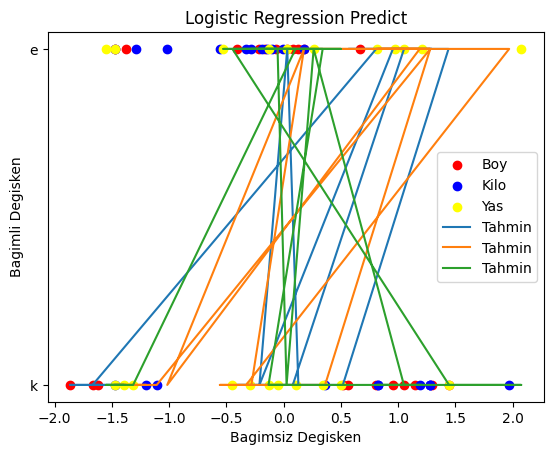

In [302]:
# Goruntu olustur
from matplotlib import pyplot as plt
plt.scatter(X[:,:1], Y,color='red', label='Boy')
plt.scatter(X[:, 1:2], Y,color='blue', label='Kilo')
plt.scatter(X[:, 2:], Y, color='yellow', label='Yas')
plt.plot(X,log.predict(X),label='Tahmin')
plt.legend()
plt.xlabel('Bagimsiz Degisken')
plt.ylabel('Bagimli Degisken')
plt.title('Logistic Regression Predict')
plt.show()